In [ ]:
import pandas as pd

In [ ]:
data_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df = pd.read_csv(data_url, sep="\t")
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


1. Вывести: кол-во наблюдений в датасете


In [ ]:
df.shape[0]

4622

2. Вывести названия столбцов

In [ ]:
df.columns.to_list()

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

3. Определить самую частую позицию (item) в заказе

In [ ]:
df.item_name.mode()[0]

'Chicken Bowl'

4. Построить гистрограмму частоты заказов по позициям (item )

Text(0.5, 0, 'item')

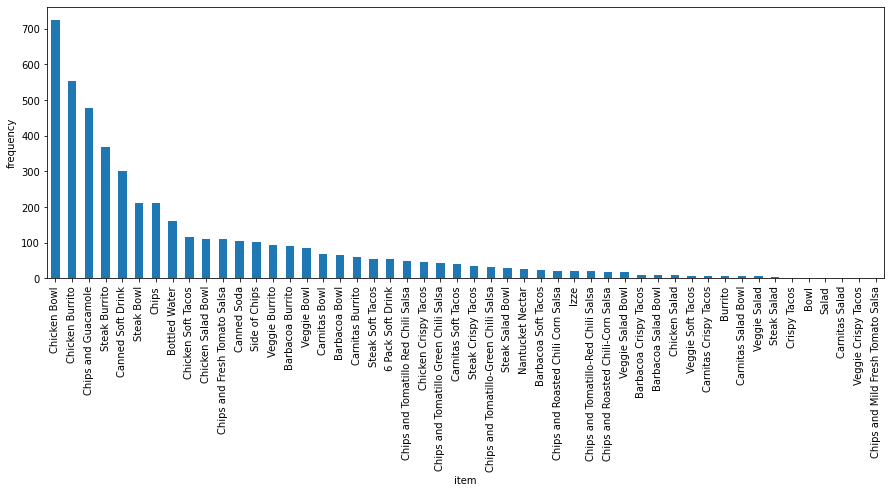

In [ ]:
graph = df.item_name.value_counts().plot(kind='bar', figsize=(15, 5))
graph.set_ylabel('frequency')
graph.set_xlabel('item')

5. Измените тип переменной item_price c с помощью лямбды функции

In [ ]:
df.item_price = df.item_price.apply(lambda x: float(x[1:]))

6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

Text(0.5, 0, 'item')

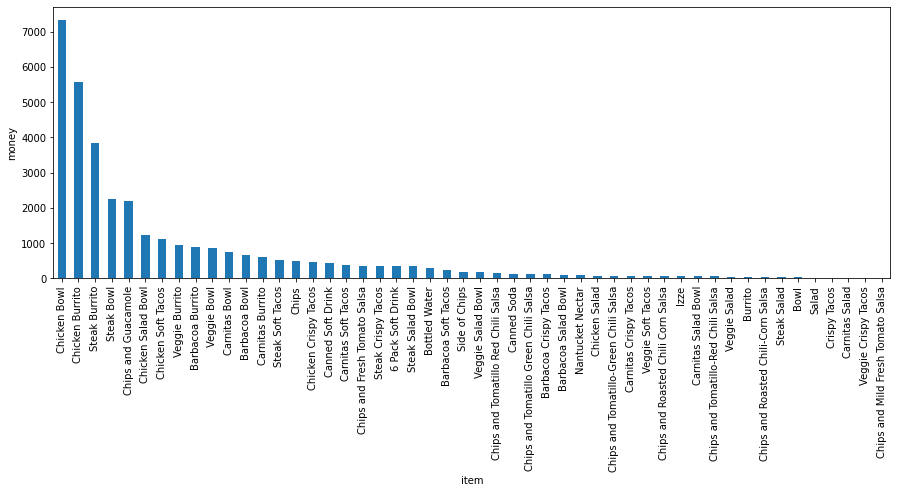

In [ ]:
graph = df.groupby('item_name').sum('item_price').sort_values('item_price', ascending=False).item_price.plot(kind='bar', figsize=(15, 5))
graph.set_ylabel('money')
graph.set_xlabel('item')

7. Средняя сумма заказа? (минимум 2 способа)

In [ ]:
print(round(df.groupby('order_id').item_price.sum().mean(), 2))
print(round(df.item_price.sum() / df.order_id.drop_duplicates().shape[0], 2))

18.81
18.81


8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [ ]:
cnts = df.groupby(['order_id'])['order_id'].count()
cnts.describe().loc[['mean', 'min', 'max', '50%']].rename({"50%": "median"}).reset_index().rename(columns={"order_id": "quantity"})

,index,quantity
0,mean,2.520174
1,min,1.000000
2,max,23.000000
3,median,2.000000
